## Data Massaging II
* Uso avanzado de pandas
* Primeros análisis
* Combinación de dataframes
* Funciones lambda aplicadas a dataframes
* Manejo de datos avanzado

### Antes de empezar
*Obtener el archivo de netflix

## Agregación de Datos

In [1]:
# Importar un archivo CSV con Pandas
# Se importa la librería Pandas
# la documentación de la librería se puede ver en: https://pandas.pydata.org/docs/
import pandas as pd

# otras librerías necesarias
import numpy as np

# Se usa la función read_csv para leer el archivo .csv
# Este archivo es el de las películas de Netflix que hemos venido utilizando
# y lo ingesta en la variable df
df= pd.read_csv("netflix_titles_2.csv")


In [2]:
df.sample(5)

,Unnamed: 0,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit,duration_unit0
3454,3454,s3455,TV Show,Rotten,NaN,NaN,United States,"October 4, 2019",2019,TV-MA,2 Seasons,"Docuseries, Science & Nature TV",This docuseries travels deep into the heart of...,2.0,season,
4576,4576,s4577,Movie,Khido Khundi,Rohit Jugraj,"Ranjit Bawa, Mandy Takhar, Manav Vij, Elnaaz N...",India,"October 1, 2018",2018,TV-14,151 min,"Dramas, International Movies, Sports Movies",An embittered former hockey star must engage w...,151.0,min,
8764,8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,191.0,min,
6494,6494,s6495,Movie,Class Rank,Eric Stoltz,"Olivia Holt, Skyler Gisondo, Kristin Chenoweth...",United States,"September 18, 2018",2018,TV-MA,103 min,Comedies,When her class rank threatens her college plan...,103.0,min,
1742,1742,s1743,Movie,Felix Lobrecht: Hype,Jan-Peter Horns,Felix Lobrecht,Germany,"November 3, 2020",2020,TV-MA,60 min,Stand-Up Comedy,Felix Lobrecht aims his dark humor at overly p...,60.0,min,


In [3]:
# Funciones estadísticas básicas
# Utilizando los campos numéricos
# PAra listar los campos se tiene la función describe
df.describe()

,Unnamed: 0,release_year,duration_num
count,8807.000000,8807.000000,8807.000000
mean,4403.000000,2014.180198,69.848530
std,2542.506244,8.819312,50.806431
min,0.000000,1925.000000,1.000000
25%,2201.500000,2013.000000,2.000000
50%,4403.000000,2017.000000,88.000000
75%,6604.500000,2019.000000,106.000000
max,8806.000000,2021.000000,312.000000


In [4]:
# Se elimina la columna con un .drop
df.drop("Unnamed: 0" , axis= "columns" , inplace= True)

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit,duration_unit0
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,season,
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,season,
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,season,
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,season,


In [6]:
df.describe()

,release_year,duration_num
count,8807.000000,8807.000000
mean,2014.180198,69.848530
std,8.819312,50.806431
min,1925.000000,1.000000
25%,2013.000000,2.000000
50%,2017.000000,88.000000
75%,2019.000000,106.000000
max,2021.000000,312.000000


In [7]:
# También se pueden obtener las estadísticas aisladas
print("Media=", df["duration_num"].mean())
print("Min=", df["duration_num"].min())
print("Max=", df["duration_num"].max())

Media= 69.84852957874418
Min= 1.0
Max= 312.0


In [8]:
# Agregación de datos, si es película (min) o serie (season)
# Cuenta cuántos son
df.groupby("duration_unit").size()

duration_unit
min       6131
season    2676
dtype: int64

<Axes: xlabel='duration_unit'>

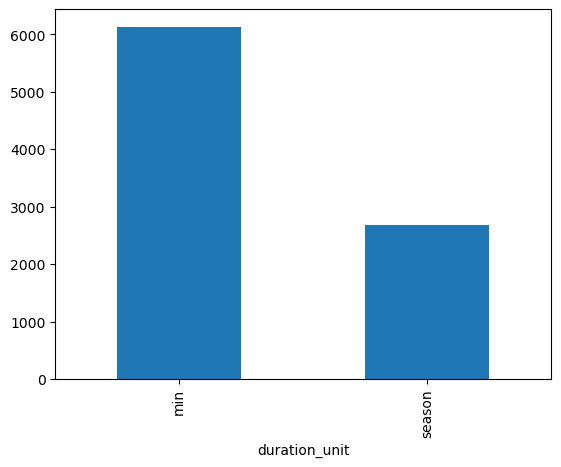

In [9]:
# Un gráfico simple de barras del número de películas y series
df.groupby("duration_unit").size().plot.bar()

### ¿Cómo calcular el total en horas tanto de películas como series?
* Las películas vienen en minutos, por lo que el número total simplemente se denería dividir para 60 minutos

In [10]:
# También se puede hacer la suma 
movie_minutes = df.loc[df["duration_unit"]=="min", "duration_num"].sum()
# Muestra las estadísticas, con 2 decimales
print(f"Total Minutes for Movies = {movie_minutes:.2f}")
print(f"Total Hours for Movies = {movie_minutes/60:.2f}")

Total Minutes for Movies = 610433.00
Total Hours for Movies = 10173.88


* Las series se tienen que calcular
* Ahora se calcula la cantidad de temporadas/seasons
* Se asume que cada season tiene un promedio de 7 episodios
* Y cada episodio dura 30 minutos
* Asi, si es que una serie tiene 1 season = 7 * 30 = 210 minutos

In [11]:
# largo en minutos
len_season_min = 7 * 30
# largo en horas de una season
len_season_hr= len_season_min /60
print (len_season_hr)

3.5


In [12]:
# Calcula el total de seasons del dataset
total_series = df.loc[df["duration_unit"] == "season" , "duration_num"].sum()
print("Total de Horas en season =",total_series)

#Ahora se multiplica el total de seasons por el largo de cada season
total_movies_hr = total_series * len_season_hr
print("Total de horas en Series=", total_movies_hr)

Total de Horas en season = 4723.0
Total de horas en Series= 16530.5


In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_num,duration_unit,duration_unit0
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min,
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,season,
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,season,
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,season,
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,season,


In [14]:
# Otra pregunta, las películas son más largas según su rating
df[["title", "country", "release_year", "duration_num", "rating"]].loc[(df["duration_unit"] == "min")]

,title,country,release_year,duration_num,rating
0,Dick Johnson Is Dead,United States,2020,90.0,PG-13
6,My Little Pony: A New Generation,NaN,2021,91.0,PG
7,Sankofa,"United States, Ghana, Burkina Faso, United Kin...",1993,125.0,TV-MA
9,The Starling,United States,2021,104.0,PG-13
12,Je Suis Karl,"Germany, Czech Republic",2021,127.0,TV-MA
...,...,...,...,...,...
8801,Zinzana,"United Arab Emirates, Jordan",2015,96.0,TV-MA
8802,Zodiac,United States,2007,158.0,R
8804,Zombieland,United States,2009,88.0,R
8805,Zoom,United States,2006,88.0,PG


<function matplotlib.pyplot.show(close=None, block=None)>

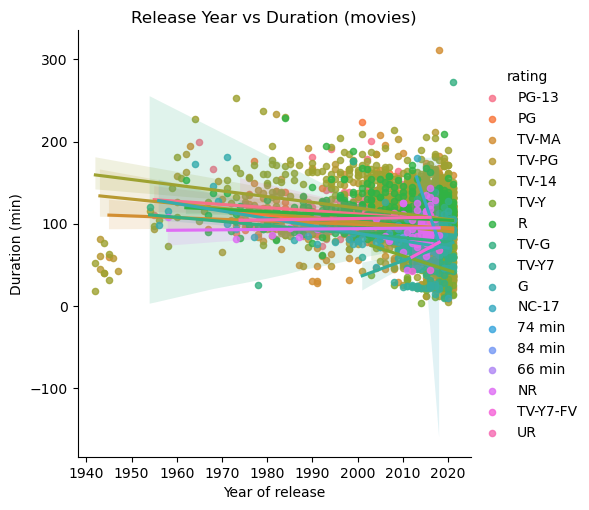

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

df_movies = df[["title", "country", "release_year" , "duration_num", "rating"]].loc[(df["duration_unit"]=="min")]
sns.lmplot(x= "release_year", y= "duration_num", data= df_movies, fit_reg= True, scatter_kws = {"marker" : "D", "s":20} , hue='rating')
plt.title("Release Year vs Duration (movies)")
plt.xlabel("Year of release")
plt.ylabel("Duration (min)")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

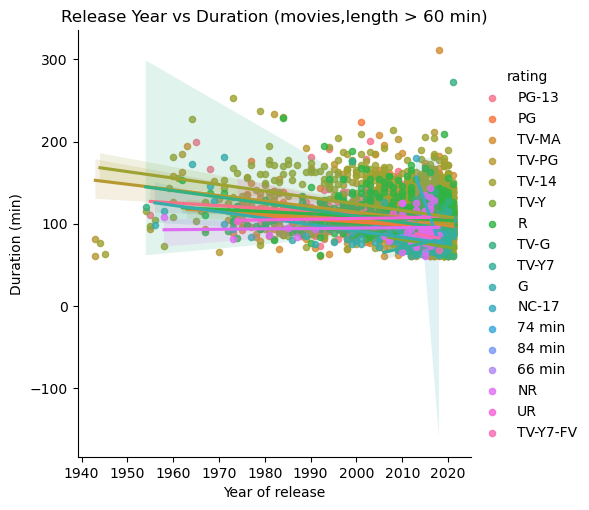

In [16]:
# Qué pasaría si es que se toman en cuenta nada más películas de por lo menos 60 minutos
df_movies2 = df[["title", "country", "release_year" , "duration_num", "rating"]].loc[(df["duration_unit"]=="min") & (df["duration_num"] >60 )]
sns.lmplot(x= "release_year", y= "duration_num", data= df_movies2, fit_reg= True, scatter_kws = {"marker" : "D", "s":20} , hue='rating')

plt.title("Release Year vs Duration (movies,length > 60 min)")
plt.xlabel("Year of release")
plt.ylabel("Duration (min)")
plt.show

In [17]:
# Agrupaciones simples
df.groupby ("type").count()["show_id"]

type
Movie      6131
TV Show    2676
Name: show_id, dtype: int64

In [18]:
#Películas por país
df.groupby("country").count()["show_id"].sort_values(ascending=False)[0:10]

country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: show_id, dtype: int64

<Axes: xlabel='country'>

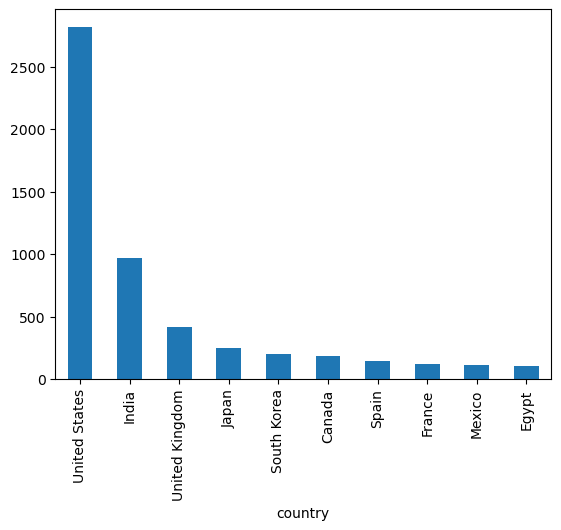

In [19]:
# Películas por país gr. Barras
df.groupby("country").count()["show_id"].sort_values(ascending=False)[0:10].plot.bar()

<Axes: ylabel='show_id'>

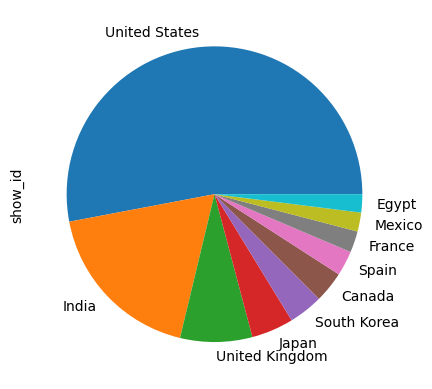

In [20]:
# para un gráfico de pie
df.groupby("country").count()["show_id"].sort_values(ascending=False)[0:10].plot.pie()

In [21]:
# películas por rating
df.groupby("rating").count()["show_id"].sort_values(ascending=False)

rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
UR             3
NC-17          3
74 min         1
84 min         1
66 min         1
Name: show_id, dtype: int64

In [22]:
# top 5
df.groupby("rating").count()["show_id"].sort_values(ascending=False)[0:5]

rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: show_id, dtype: int64

<Axes: ylabel='show_id'>

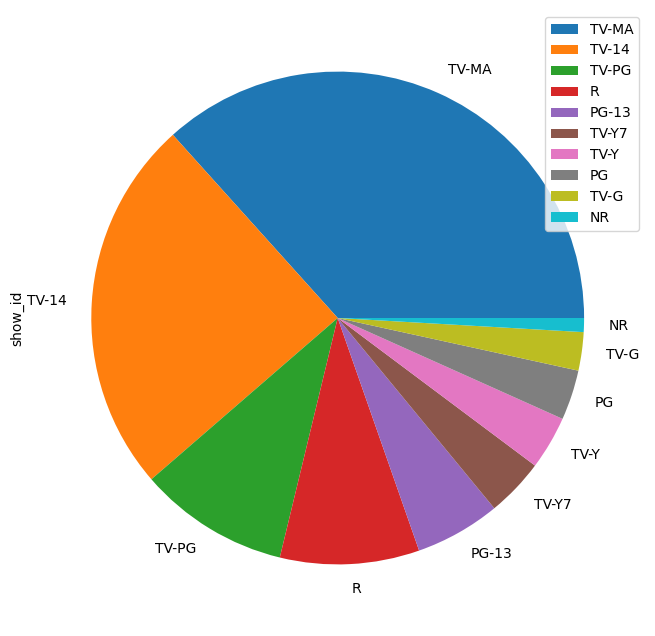

In [23]:
df.groupby("rating").count()["show_id"].sort_values(ascending=False)[0:10].plot.pie(y="rating", figsize=(8,8), legend= True)

## Combinación y Manejo de Dataframes

In [24]:
# Nuevo dataframe
clase= [("Jorge", 22 ,"MX"),
         ("Anita", 31,"MX"),
         ("Raúl", 16,"BR"),
         ("Simón", 41,"BR"),
         ("Diego",33,"PA"),
         ("JOrge",35,"PA"),
         ("Almendra",35,"PA"),
         ("Mary",37,"CO"),
         ("Peter", 40, "EC"),
         ("Andrés", 48, "EC")
         ]
df_clase = pd.DataFrame(clase, columns=["Nombre", "Edad", "País"],)

In [25]:
type(clase)

list

In [26]:
# Dataframe 2, con otra clase
clase2=[("Mauricio", 25,"MX"),
        ("Gladys", 41, "PA"),
        ("Sebastián", 36, "BR")
        ]
df_clase2= pd.DataFrame(clase2, columns= ["Nombre", "Edad", "País"])

In [27]:
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [28]:
df_clase2

,Nombre,Edad,País
0,Mauricio,25,MX
1,Gladys,41,PA
2,Sebastián,36,BR


In [29]:
# Con el uso del comando append, se pueden combinar 2 DataFrames
df_clase.append(df_clase2)

C:\Users\alara\AppData\Local\Temp\ipykernel_22892\2758951912.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clase.append(df_clase2)


,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [30]:
df_clase
# Por qué no se genera el dataframe df_clase?
# Porque se tiene que asignar la variable al .Append

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [31]:
df_clase=df_clase.append(df_clase2)

C:\Users\alara\AppData\Local\Temp\ipykernel_22892\188160871.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_clase=df_clase.append(df_clase2)


In [32]:
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [33]:
# Reindexación
df_clase.reset_index(level=None, drop= True, inplace= True)

In [34]:
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


### Eliminación de Datos

In [35]:
df_claseElim = df_clase

In [36]:
df_claseElim

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [37]:
# Eliminar registro # 2 utilizando drop
df_claseElim.drop(2).head()

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA


In [38]:
# para eliminarla definitivamente
df_claseElim = df_claseElim.drop(2)

In [39]:
df_claseElim.head()

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA


In [40]:
# Elimina dos al mismo tiempo
df_claseElim.drop([7,8], axis=0, inplace=True)

In [41]:
df_claseElim

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
9,Andrés,48,EC
10,Mauricio,25,MX
11,Gladys,41,PA
12,Sebastián,36,BR


In [42]:
# Registris que cumplen la condición
df_claseElim[df_claseElim["Edad"]<40]

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
10,Mauricio,25,MX
12,Sebastián,36,BR


In [43]:
# Drop con condición
# Se elimina a todos los alumnos menor de 40 años
df_claseElim.drop(df_claseElim[df_claseElim["Edad"]<40].index, inplace= True)

In [44]:
df_claseElim

,Nombre,Edad,País
3,Simón,41,BR
9,Andrés,48,EC
11,Gladys,41,PA


In [45]:
df_claseUpd = df_clase

In [46]:
df_claseUpd

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [47]:
#Actualizar datos de un dataframe
#Usando loc
df_claseUpd.loc[3,"Nombre"] = "Ramón"

In [48]:
df_claseUpd

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Ramón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [49]:
df_clase2[df_clase2["Edad"]==41]

,Nombre,Edad,País
1,Gladys,41,PA


In [50]:
# Actualizar basado en condición
# Rebaja un año la edad
df_claseUpd.loc[(df_clase2[df_clase2["Edad"]==41].index),"Edad"] = 40

In [51]:
df_claseUpd

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,40,MX
2,Raúl,16,BR
3,Ramón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [52]:
# Condición
df_claseUpd[df_claseUpd["Edad"]==41].index

Int64Index([3, 11], dtype='int64')

In [53]:
# Actualizar basado en condición
# Rebaja un año la edad
df_claseUpd.loc[(df_claseUpd[df_claseUpd["Edad"]==41].index),"Edad"] = 40

In [54]:
df_claseUpd

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,40,MX
2,Raúl,16,BR
3,Ramón,40,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


### Merge de DataFrames

In [55]:
clase= [("Jorge", 22 ,"MX"),
         ("Anita", 31,"MX"),
         ("Raúl", 16,"BR"),
         ("Simón", 41,"BR"),
         ("Diego",33,"PA"),
         ("JOrge",35,"PA"),
         ("Almendra",35,"PA"),
         ("Mary",37,"CO"),
         ("Peter", 40, "EC"),
         ("Andrés", 48, "EC")
         ]
df_clase3 = pd.DataFrame(clase, columns=["Nombre", "Edad", "País"],)

In [56]:
clase=[("Jorge", 122 ,"MX"),
         ("Anita", 131,"MX"),
         ("Raúl", 116,"BR"),
         ("Simón", 141,"BR")
         ]
df_clase4 = pd.DataFrame(clase, columns=["Nombre", "Edad", "País"],)

In [57]:
df_clase3

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Simón,41,BR
4,Diego,33,PA
5,JOrge,35,PA
6,Almendra,35,PA
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [58]:
df_clase4

,Nombre,Edad,País
0,Jorge,122,MX
1,Anita,131,MX
2,Raúl,116,BR
3,Simón,141,BR


In [59]:
# Merge simple
df_clase3.merge(df_clase4,left_on="Nombre",right_on="Nombre")

,Nombre,Edad_x,País_x,Edad_y,País_y
0,Jorge,22,MX,122,MX
1,Anita,31,MX,131,MX
2,Raúl,16,BR,116,BR
3,Simón,41,BR,141,BR


In [60]:
#otra forma de merge
df_clase3.merge(df_clase4, how= "inner",on="País")

,Nombre_x,Edad_x,País,Nombre_y,Edad_y
0,Jorge,22,MX,Jorge,122
1,Jorge,22,MX,Anita,131
2,Anita,31,MX,Jorge,122
3,Anita,31,MX,Anita,131
4,Raúl,16,BR,Raúl,116
5,Raúl,16,BR,Simón,141
6,Simón,41,BR,Raúl,116
7,Simón,41,BR,Simón,141


In [61]:
#Producto cartesiano (genera combinaciones)
df_clase3.merge(df_clase4,how="cross")

,Nombre_x,Edad_x,País_x,Nombre_y,Edad_y,País_y
0,Jorge,22,MX,Jorge,122,MX
1,Jorge,22,MX,Anita,131,MX
2,Jorge,22,MX,Raúl,116,BR
3,Jorge,22,MX,Simón,141,BR
4,Anita,31,MX,Jorge,122,MX
5,Anita,31,MX,Anita,131,MX
6,Anita,31,MX,Raúl,116,BR
7,Anita,31,MX,Simón,141,BR
8,Raúl,16,BR,Jorge,122,MX
9,Raúl,16,BR,Anita,131,MX


## Aplicando funciones Lamda a un dataframe
* Las funciones Lambda son funciones anónimas (no tienen declaración formal).
* Pueden tomar cualquier número de argumentos, pero solamente tener una expresión.
* Son anónimas, no necesitan declaración, o statements internos como "return", "pass", etc.
* Muy productivas y eficientes.
* Las van a utilizar durante toda su vida de programación con Python.
* Comando apply.

In [62]:
import pandas as pd

# otras librerías necesarias
import numpy as np
# Nuevo DataFrame
clase= [("Jorge", 22 ,"MX"),
         ("Anita", 31,"MX"),
         ("Raúl", 16,"BR"),
         ("Simón", 41,"BR"),
         ("Diego",33,"PA"),
         ("Jorge",35,"PA"),
         ("Almendra",35,"CO"),
         ("Mary",37,"CO"),
         ("Peter", 40, "EC"),
         ("Andrés", 48, "EC")
         ]
df_clase = pd.DataFrame(clase, columns=["Nombre", "Edad", "País"],)

In [63]:
df_clase

,Nombre,Edad,País
0,Jorge,22,MX
1,Anita,31,MX
2,Raúl,16,BR
3,Simón,41,BR
4,Diego,33,PA
5,Jorge,35,PA
6,Almendra,35,CO
7,Mary,37,CO
8,Peter,40,EC
9,Andrés,48,EC


In [64]:
# Buscando si la edad es para o impar
df_clase["Par-Impar"] = df_clase ["Edad"].apply(lambda x:"Impar" if int(x) % 2 else "Par")
# En este caso, Edad se envía como parámetro a la función lambda, que busca si Edad/2 es entero o no

In [65]:
df_clase

,Nombre,Edad,País,Par-Impar
0,Jorge,22,MX,Par
1,Anita,31,MX,Impar
2,Raúl,16,BR,Par
3,Simón,41,BR,Impar
4,Diego,33,PA,Impar
5,Jorge,35,PA,Impar
6,Almendra,35,CO,Impar
7,Mary,37,CO,Impar
8,Peter,40,EC,Par
9,Andrés,48,EC,Par


In [66]:
df_clase.groupby("Par-Impar").count()["Nombre"] 

Par-Impar
Impar    6
Par      4
Name: Nombre, dtype: int64

<Axes: xlabel='Par-Impar'>

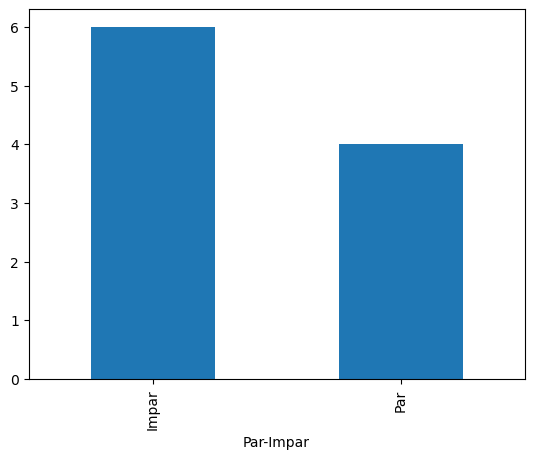

In [67]:
df_clase.groupby("Par-Impar").count()["Nombre"].plot.bar()

In [68]:
# Ejemplo lambda 2: Descuento del 10% para mayores de 37 años
df_clase["Dcto"] = df_clase["Edad"].apply(lambda x:0.1 if x > 37 else 0.0)

In [69]:
df_clase

,Nombre,Edad,País,Par-Impar,Dcto
0,Jorge,22,MX,Par,0.0
1,Anita,31,MX,Impar,0.0
2,Raúl,16,BR,Par,0.0
3,Simón,41,BR,Impar,0.1
4,Diego,33,PA,Impar,0.0
5,Jorge,35,PA,Impar,0.0
6,Almendra,35,CO,Impar,0.0
7,Mary,37,CO,Impar,0.0
8,Peter,40,EC,Par,0.1
9,Andrés,48,EC,Par,0.1


In [70]:
# "Ejemplo de lambda 3: Zona Horaria
import pytz
df_clase["ZonaHoraria"] = df_clase ["País"].apply(lambda x : pytz.country_timezones[x])


In [71]:
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/..."
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/..."
2,Raúl,16,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta..."
3,Simón,41,BR,Impar,0.1,"[America/Noronha, America/Belem, America/Forta..."
4,Diego,33,PA,Impar,0.0,[America/Panama]
5,Jorge,35,PA,Impar,0.0,[America/Panama]
6,Almendra,35,CO,Impar,0.0,[America/Bogota]
7,Mary,37,CO,Impar,0.0,[America/Bogota]
8,Peter,40,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]"
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]"


In [72]:
# Finalmente, se obtiene la capital de cada país, en el caso e que se tengan que generar
# comunicados o envíos físicos
# primero, se instala la librería - pip install countryinfo
df_clase["NombrePaís"] = df_clase ["País"].apply(lambda x:pytz.country_names[x])

In [73]:
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria,NombrePaís
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico
2,Raúl,16,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil
3,Simón,41,BR,Impar,0.1,"[America/Noronha, America/Belem, America/Forta...",Brazil
4,Diego,33,PA,Impar,0.0,[America/Panama],Panama
5,Jorge,35,PA,Impar,0.0,[America/Panama],Panama
6,Almendra,35,CO,Impar,0.0,[America/Bogota],Colombia
7,Mary,37,CO,Impar,0.0,[America/Bogota],Colombia
8,Peter,40,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador


In [74]:
pip install countryinfo

Note: you may need to restart the kernel to use updated packages.


In [75]:
# se importa la librería CountryInfo
# luego con base en el nombre del país, se obtiene su capital
from countryinfo import CountryInfo
df_clase["Capital"] = df_clase["NombrePaís"].apply(lambda x:CountryInfo(x).capital())

In [76]:
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria,NombrePaís,Capital
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
2,Raúl,16,BR,Par,0.0,"[America/Noronha, America/Belem, America/Forta...",Brazil,Brasília
3,Simón,41,BR,Impar,0.1,"[America/Noronha, America/Belem, America/Forta...",Brazil,Brasília
4,Diego,33,PA,Impar,0.0,[America/Panama],Panama,Panama City
5,Jorge,35,PA,Impar,0.0,[America/Panama],Panama,Panama City
6,Almendra,35,CO,Impar,0.0,[America/Bogota],Colombia,Bogotá
7,Mary,37,CO,Impar,0.0,[America/Bogota],Colombia,Bogotá
8,Peter,40,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito


In [77]:
# Se abre un curso en portugués, por lo que los alumnos de Brasil tienen que salir del listado actual
index_br = df_clase[(df_clase["País"]== "BR")].index

In [78]:
# corresponde a los registros 2 y 3
index_br

Int64Index([2, 3], dtype='int64')

In [79]:
# eLimina los registros correspondientes
df_clase.drop(index_br, inplace = True)

In [80]:
df_clase

,Nombre,Edad,País,Par-Impar,Dcto,ZonaHoraria,NombrePaís,Capital
0,Jorge,22,MX,Par,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
1,Anita,31,MX,Impar,0.0,"[America/Mexico_City, America/Cancun, America/...",Mexico,Mexico City
4,Diego,33,PA,Impar,0.0,[America/Panama],Panama,Panama City
5,Jorge,35,PA,Impar,0.0,[America/Panama],Panama,Panama City
6,Almendra,35,CO,Impar,0.0,[America/Bogota],Colombia,Bogotá
7,Mary,37,CO,Impar,0.0,[America/Bogota],Colombia,Bogotá
8,Peter,40,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito
9,Andrés,48,EC,Par,0.1,"[America/Guayaquil, Pacific/Galapagos]",Ecuador,Quito


In [81]:
# Agrupamiento por país
print(df_clase.groupby("País").size())

País
CO    2
EC    2
MX    2
PA    2
dtype: int64


In [82]:
print(df_clase.groupby("País").mean()["Edad"])

País
CO    36.0
EC    44.0
MX    26.5
PA    34.0
Name: Edad, dtype: float64


C:\Users\alara\AppData\Local\Temp\ipykernel_22892\1972680938.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df_clase.groupby("País").mean()["Edad"])


In [83]:
import seaborn as sns

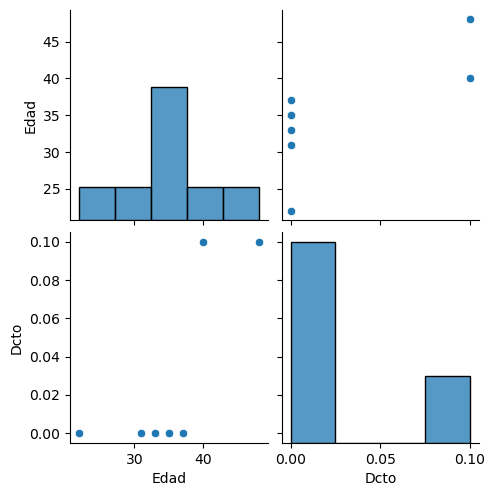

In [84]:
# Gráfico tipo pairplot
sns.pairplot(df_clase)

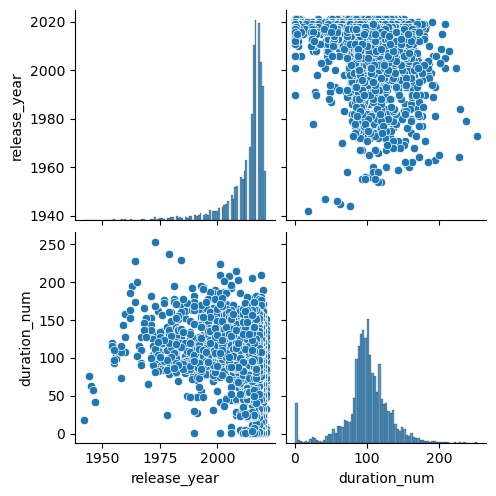

In [85]:
#Eliminar fias con duplicados y nulos
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
#Visualizar
sns.pairplot(df)

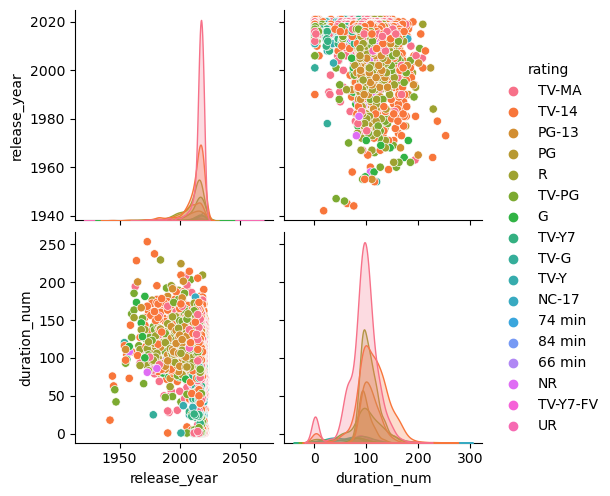

In [87]:
#Visualize pairplot of df
sns.pairplot(df,hue="rating")

In [89]:
df.describe()

,release_year,duration_num
count,5335.000000,5335.000000
mean,2012.742830,99.908341
std,9.623423,30.461542
min,1942.000000,1.000000
25%,2011.000000,88.000000
50%,2016.000000,100.000000
75%,2018.000000,116.000000
max,2021.000000,253.000000


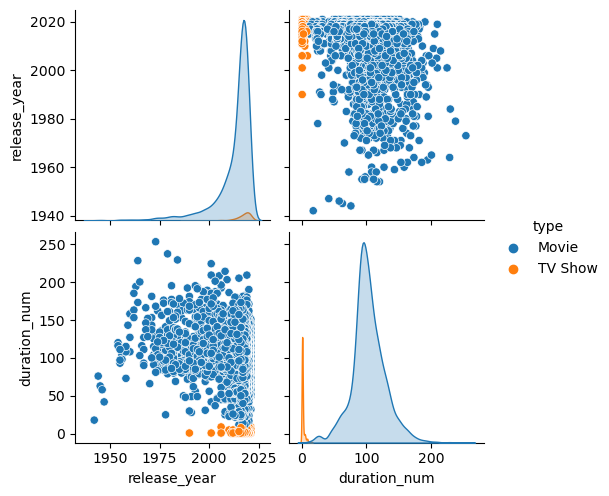

In [91]:
# Visualize pairplot of df
sns.pairplot(df,hue = "type")